# Hierarchical Complete Linkage Clustering
## reference: Python_Machine_learning_with_Scikit_and_TensorFlow

In [114]:
# make data and visualize them
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df


,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [115]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df.values,metric='euclidean'),method='complete')        

In [116]:
pd.DataFrame(row_clusters,
 columns=['row label 1',
 'row label 2',
 'distance',
 'no. of items in clust.'],
 index=['cluster %d' %(i+1) for i in
 range(row_clusters.shape[0])])


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


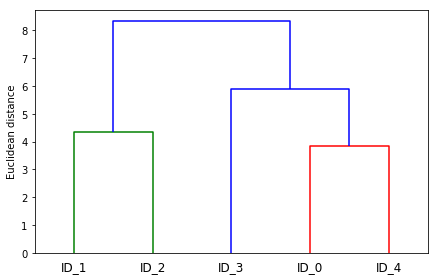

In [117]:
# Visualize in the form of a dendrogram
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters,
 labels=labels,
 # make dendrogram black (part 2/2)
 # color_threshold=np.inf
 )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()


In [118]:
# Attaching dendrograms to a heat map
fig = plt.figure(figsize=(8,8),facecolor='white')
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters,orientation='left')

In [119]:
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

In [120]:
axm = fig.add_axes([0.23,0.1,0.6,.6])
cax=axm.matshow(df_rowclust,interpolation='nearest',cmap='hot_r')

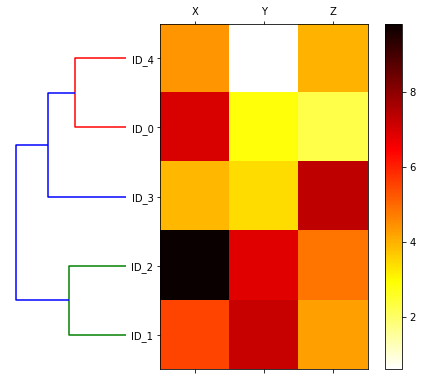

In [121]:
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
    
fig.colorbar(cax)
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))
plt.show()

# Applying agglomerative clustering via scikit-learn

In [122]:
from sklearn.cluster import AgglomerativeClustering

In [123]:
ac = AgglomerativeClustering(n_clusters=3,affinity='euclidean',
                        linkage='complete')

In [124]:
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


# Locating regions of high density via DBSCAN

In [125]:
# Density-based Spatial Clustering of Applications with Noise (DBSCAN)
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)

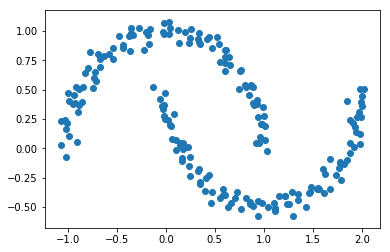

In [126]:
plt.scatter(X[:,0],X[:,1])
plt.show()

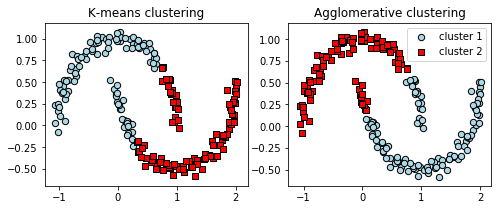

In [127]:
from sklearn.cluster import KMeans
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2,
random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
 X[y_km==0,1],
 c='lightblue',
 edgecolor='black',
 marker='o',
 s=40,
 label='cluster 1')
ax1.scatter(X[y_km==1,0],
 X[y_km==1,1],
 c='red',
 edgecolor='black',
 marker='s',
 s=40,
 label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,
 affinity='euclidean',
 linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
 X[y_ac==0,1],
 c='lightblue',
 edgecolor='black',
 marker='o',
 s=40,
 label='cluster 1')
ax2.scatter(X[y_ac==1,0],
 X[y_ac==1,1],
 c='red',
 edgecolor='black',
 marker='s',
 s=40,
 label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()


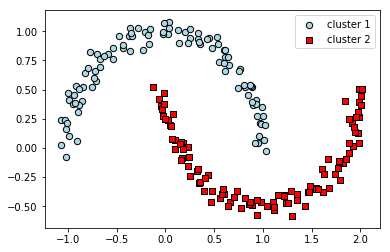

In [128]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
 min_samples=5,
 metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],
 X[y_db==0,1],
 c='lightblue',
 edgecolor='black',
 marker='o',
 s=40,
 label='cluster 1')
plt.scatter(X[y_db==1,0],
 X[y_db==1,1],
 c='red',
 edgecolor='black',
 marker='s',
 s=40,
 label='cluster 2')
plt.legend()
plt.show()
